# Data Manipulation Steps 

The required Python libraries and the data found in the AirBnB website (http://insideairbnb.com/get-the-data.html) are initially imported. In each of the imported csv files the date columns are converted to date object types, the price column is cleared from its currency symbol in order for aggregations to be performed on this column and some other columns are converted to categorical variables (e.g. neighbourhood).  

In [28]:
# Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
# Import all the required data

calendar = pd.read_csv("calendar.csv", parse_dates=['date'], encoding='utf-8')
calendar['price'] = calendar['price'].str.replace(',', '').str.replace('$', '').astype(float)
calendar['price'] = calendar['price'].apply(pd.to_numeric) 
calendar.head(10000)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,10595,2019-11-19,f,59.0,$59.00,1,45
1,10595,2019-11-20,f,59.0,$59.00,1,45
2,10595,2019-11-21,f,59.0,$59.00,1,45
3,10595,2019-11-22,f,59.0,$59.00,1,45
4,10595,2019-11-23,f,59.0,$59.00,1,45
5,10595,2019-11-24,f,59.0,$59.00,1,45
6,10595,2019-11-25,f,59.0,$59.00,1,45
7,10595,2019-11-26,f,59.0,$59.00,1,45
8,10595,2019-11-27,f,59.0,$59.00,1,45
9,10595,2019-11-28,f,59.0,$59.00,1,45


In [30]:
# Import all the required data

listings = pd.read_csv("listings.csv", parse_dates=['last_review'], encoding='utf-8')
listings['neighbourhood'] = listings['neighbourhood'].astype('category')
listings['room_type'] = listings['room_type'].astype('category')
listings.head(100)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,10595,"96m2, 3BR, 2BA, Metro, WI-FI etc...",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98888,23.76431,Entire home/apt,80,1,22,2019-08-07,0.21,6,304
1,10990,"50m2, Metro, WI-FI, cableTV, more",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98783,23.76479,Entire home/apt,50,1,31,2019-04-21,0.35,6,337
2,10993,Athens Quality Apartments - Studio,37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98861,23.76422,Entire home/apt,44,1,47,2019-04-17,0.54,6,326
3,10995,"47m2, close to metro,cable TV,wi-fi",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98950,23.76356,Entire home/apt,50,1,19,2019-04-19,0.17,6,343
4,27262,"54m2, 1-br, cable tv, wi-fi, metro",37177,Emmanouil,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.98893,23.76475,Entire home/apt,50,1,16,2017-05-15,0.18,6,344
5,28186,❤️Deluxe central loft near Acropolis❤️,121318,Francis - Fotios,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.97680,23.72924,Entire home/apt,49,2,446,2019-11-16,4.88,2,361
6,31155,sleep on sailing boat,133845,Irene,NaN,ΚΕΡΑΜΕΙΚΟΣ,37.97962,23.71589,Private room,39,1,0,NaT,NaN,1,365
7,33704,"Artist's studio in Athens, safe area, near metro",145728,Nicole,NaN,ΑΜΠΕΛΟΚΗΠΟΙ,37.99052,23.76593,Entire home/apt,35,7,38,2019-09-26,1.39,1,89
8,33945,Spacious Cosy aprtm very close to Metro!,146553,Katerina,NaN,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,38.00853,23.72938,Entire home/apt,30,2,71,2019-08-18,0.64,2,353
9,38100,Stay at the heart of Athens (100m²),163481,Alexandros,NaN,ΠΑΓΚΡΑΤΙ,37.97075,23.74259,Entire home/apt,48,3,197,2019-10-24,1.74,2,202


In [32]:
# Import all the required data

neighbourhoods = pd.read_csv("neighbourhoods.csv", encoding='utf-8')
neighbourhoods.head(100)

,neighbourhood_group,neighbourhood
0,NaN,1Ο ΝΕΚΡΟΤΑΦΕΙΟ
1,NaN,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ
2,NaN,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ
3,NaN,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ
4,NaN,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ
5,NaN,ΑΚΡΟΠΟΛΗ
6,NaN,ΑΜΠΕΛΟΚΗΠΟΙ
7,NaN,ΑΝΩ ΚΥΨΕΛΗ
8,NaN,ΑΝΩ ΠΑΤΗΣΙΑ
9,NaN,ΒΟΤΑΝΙΚΟΣ


In [33]:
# Import all the required data

reviews = pd.read_csv("reviews.csv", parse_dates=['date'], encoding='utf-8')
reviews.head(40)

,listing_id,date
0,10595,2011-05-20
1,10595,2012-08-15
2,10595,2013-05-20
3,10595,2014-05-04
4,10595,2014-09-13
5,10595,2015-04-25
6,10595,2015-05-17
7,10595,2015-05-25
8,10595,2015-09-23
9,10595,2015-12-29


# Question 1: Neighbourhood Listings in Descending Order 

We initially group by neighbourhood the listings data to understand which are the neighbourhoods in which the most listings are located. Then we sort all the listings data of the relevant dataframe based on the frequency of these neighbourhoods.

In [34]:
neighbourhoods_frequency = listings.groupby('neighbourhood').size().sort_values(ascending=False)
neighbourhoods_frequency

neighbourhood
ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ              1788
ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ                  949
ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ             881
ΝΕΟΣ ΚΟΣΜΟΣ                          837
ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ     740
ΠΑΓΚΡΑΤΙ                             524
ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ                      511
ΚΟΛΩΝΑΚΙ                             413
ΑΚΡΟΠΟΛΗ                             406
ΑΜΠΕΛΟΚΗΠΟΙ                          367
ΠΕΤΡΑΛΩΝΑ                            325
ΘΗΣΕΙΟ                               316
ΚΥΨΕΛΗ                               297
ΚΕΡΑΜΕΙΚΟΣ                           281
ΣΤΑΔΙΟ                               250
ΙΛΙΣΙΑ                               212
ΓΟΥΔΙ                                162
ΛΥΚΑΒΗΤΤΟΣ                           156
ΓΚΥΖΗ                                138
ΖΑΠΠΕΙΟ                              131
ΠΑΤΗΣΙΑ                              130
ΝΙΡΒΑΝΑ                              129
ΠΛΑΤΕΙΑ ΑΜΕΡΙΚΗΣ                     128
ΚΟΛΩΝΟΣ                              106
ΓΚ

In [35]:
sorted_listings_per_neighbourhood = listings.assign(freq=listings.apply(lambda x: listings.neighbourhood.value_counts()\
  .to_dict()[x.neighbourhood], axis=1))\
  .sort_values(by=['freq','neighbourhood'],ascending=[False,True])
sorted_listings_per_neighbourhood.head(100000)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,freq
5,28186,❤️Deluxe central loft near Acropolis❤️,121318,Francis - Fotios,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.97680,23.72924,Entire home/apt,49,2,446,2019-11-16,4.88,2,361,1788
10,40149,Great View - Heart of Athens wifi,172333,Athens,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.97969,23.72900,Entire home/apt,43,2,301,2019-10-30,2.88,3,348,1788
11,40150,Syntagma Heart of Athens free wifi,172333,Athens,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.97968,23.73037,Entire home/apt,37,3,138,2019-10-15,1.25,3,365,1788
14,49489,3bdr apt in the heart of Athens,225612,Stathis,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.97692,23.73040,Entire home/apt,120,2,121,2019-10-07,1.21,1,303,1788
22,85400,Plaka area Close to Acropolis Museum,172333,Athens,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.97447,23.72917,Entire home/apt,35,2,42,2019-11-11,0.68,3,356,1788
24,119682,Acropolis apartment GREAT LOCATION,603724,Manolis,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.97260,23.72536,Entire home/apt,65,2,122,2019-10-04,1.20,1,213,1788
36,196935,Large living space near Syntagma,860485,Theodore & Reshma,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.97503,23.73236,Entire home/apt,45,2,47,2018-05-22,0.48,1,0,1788
38,201028,SPACE IN ATHENS WITH BREAKFAST 64,556615,Miglen,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.98544,23.72699,Private room,18,2,85,2019-11-11,1.25,16,365,1788
39,203147,Athens downtown NEW Private bedroom 34,556615,Miglen,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.98540,23.72780,Private room,18,2,130,2019-11-11,1.30,16,365,1788
40,203157,6-2 - SINGLE BEDS ROOM BREAKFAST TVWIFI 62,556615,Miglen,NaN,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,37.98429,23.72914,Private room,24,2,117,2019-09-20,1.17,16,0,1788


# Question 2: Neighbourhood Prices in Descending Order

The prices of the listings are grouped by neighbourhood and the requested aggregations (mean, median, standard deviation, size) are performed on the prices of each neighbourhood. Then the calculated data are sorted by median in descending order. 

In [38]:
prices_per_neighbourhood = listings.groupby('neighbourhood')['price'].agg({'mean': np.mean, 'median': np.median, 'std': np.std, 'size': np.size}).reset_index()
df_prices_per_neighbourhood = pd.DataFrame(prices_per_neighbourhood)
df_prices_per_neighbourhood['mean'] = df_prices_per_neighbourhood['mean'].round(2)
df_prices_per_neighbourhood['std'] = df_prices_per_neighbourhood['std'].round(2)
df_prices_per_neighbourhood.sort_values(by=['median'], inplace=True, ascending=False)
df_prices_per_neighbourhood

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,neighbourhood,mean,median,std,size
39,ΡΗΓΙΛΛΗΣ,96.25,74.0,77.51,16
15,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,91.48,70.0,86.96,1788
21,ΚΟΛΩΝΑΚΙ,82.19,65.0,61.14,413
5,ΑΚΡΟΠΟΛΗ,83.48,60.0,78.58,406
17,ΘΗΣΕΙΟ,80.47,60.0,65.70,316
25,ΛΥΚΑΒΗΤΤΟΣ,98.15,60.0,122.87,156
16,ΖΑΠΠΕΙΟ,78.37,60.0,55.21,131
23,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,84.90,50.0,392.11,949
19,ΚΕΡΑΜΕΙΚΟΣ,71.63,50.0,85.87,281
18,ΙΛΙΣΙΑ,61.72,50.0,35.54,212


# Question 3: Availability per day

The available listings are initially filtered and counted after having been grouped by date. When plotting this available, we observe that the most available listings can be found February and May. 

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


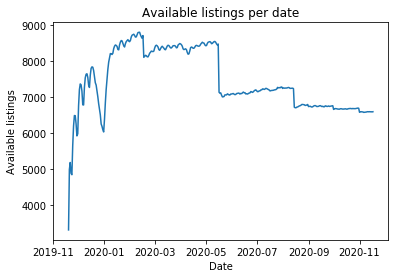

In [39]:
availability_per_date = calendar.loc[calendar['available'] == 't', ['date']].groupby('date').size().to_frame('no_listings_available').reset_index()
df_availability_per_date = pd.DataFrame(availability_per_date) 

# Plotting the listings' availability
plt.plot(df_availability_per_date.date, df_availability_per_date.no_listings_available) 

# Naming the x axis 
plt.xlabel('Date') 
# Naming the y axis 
plt.ylabel('Available listings') 
# Giving a title 
plt.title('Available listings per date') 

plt.show() 

# Question 4: Reviews, Occupacy per Listing, Average Income

The reviews are initially grouped by listing id, rounded up to the closest hundred and sorted in ascending order. Then, as shown below, after a number of experimentations 10 bins were finally selected to plot the reviews' distribution.

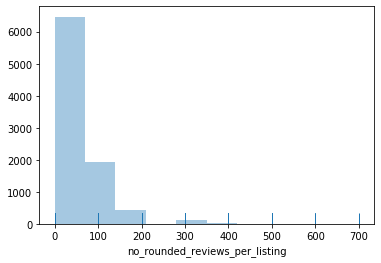

In [40]:
# Question 4(a): Number of reviews

reviews_frequency = reviews.groupby(['listing_id']).size().reset_index(name='no_reviews_per_listing')
reviews_frequency.sort_values(by=['no_reviews_per_listing'], inplace=True, ascending=True)
reviews_frequency['no_rounded_reviews_per_listing'] = reviews_frequency.no_reviews_per_listing.round(decimals=-2)
    
# Plot the histogram
sns.distplot(reviews_frequency.no_rounded_reviews_per_listing, bins=10, kde=False, rug=True)

In [41]:
# Question 4(b): Average occupancy per listing per month

# Extract the month from the review date
reviews['month'] = reviews['date'].dt.month
# Calculate the number of reviews per month and listing
rev_month_per_listing = reviews.groupby(['month','listing_id']).size().reset_index(name='reviews')
df_rev_month_per_listing = pd.DataFrame(rev_month_per_listing)
# Calculate the number of bookings per month and listing based on reviews (i.e. occupacy)
df_rev_month_per_listing['bookings'] = pd.Series(rev_month_per_listing['reviews'] * 2, index=df_rev_month_per_listing.index)

df_rev_month_per_listing

,month,listing_id,reviews,bookings
0,1,10595,1,2
1,1,10990,5,10
2,1,10993,10,20
3,1,10995,2,4
4,1,27262,1,2
5,1,28186,20,40
6,1,33704,2,4
7,1,33945,4,8
8,1,38100,11,22
9,1,40149,11,22


In [42]:
# Question 4(c): Average income per month and listing (i.e. month average price * listing's bookings * 3)

# Find the month average price
# a. Extract the month from the listing date 
calendar['month'] = calendar['date'].dt.month

# b. Calculate the total prices(sumPrices) and listings(listingsCount) to calculate the average price (avgPricePerMonth)
prices = pd.DataFrame(calendar.groupby(['month','listing_id'])['price'].agg({'sumPrices': np.sum})).reset_index()
monthAndListingsCounts = pd.DataFrame(prices.groupby(['month'])['sumPrices'].sum().reset_index())
monthAndListingsCounts['listingsCount'] = pd.Series(prices.groupby(['month'])['listing_id'].count(), index=df_rev_month_per_listing.index).shift(-1)
monthAndListingsCounts['avgPricePerMonth'] = pd.Series(monthAndListingsCounts['sumPrices'] / monthAndListingsCounts['listingsCount'], index=df_rev_month_per_listing.index)

# Calculate the (listing's bookings * 3) (i.e. reservation days)
df_rev_month_per_listing['reservationDays'] = pd.Series(df_rev_month_per_listing['bookings'] * 3 , index=df_rev_month_per_listing.index)

# Calculate the income for each month and listing by multiplying the reservation days with the month average price 
# a. Ιnitialize column income in dataframe
df_rev_month_per_listing['income'] = ""

# b. For optimization in calculations the data collected per month
Jan = df_rev_month_per_listing[df_rev_month_per_listing.month == 1] 
Feb = df_rev_month_per_listing[df_rev_month_per_listing.month == 2]
Mar = df_rev_month_per_listing[df_rev_month_per_listing.month == 3] 
Apr = df_rev_month_per_listing[df_rev_month_per_listing.month == 4] 
May = df_rev_month_per_listing[df_rev_month_per_listing.month == 5] 
Jun = df_rev_month_per_listing[df_rev_month_per_listing.month == 6] 
Jul = df_rev_month_per_listing[df_rev_month_per_listing.month == 7] 
Aug = df_rev_month_per_listing[df_rev_month_per_listing.month == 8] 
Sep = df_rev_month_per_listing[df_rev_month_per_listing.month == 9] 
Oct = df_rev_month_per_listing[df_rev_month_per_listing.month == 10] 
Nov = df_rev_month_per_listing[df_rev_month_per_listing.month == 11] 
Dec = df_rev_month_per_listing[df_rev_month_per_listing.month == 12] 

# c. Find for each month the average income per listing
df_jan = pd.DataFrame(Jan)
df_jan['income'] = df_jan['reservationDays']*monthAndListingsCounts['avgPricePerMonth'][0]
df_jan['income'] = df_jan['income'].round(2)
df_jan['income'] = '$' + df_jan['income'].astype(str)
df_jan

df_feb = pd.DataFrame(Feb)
df_feb['income'] = df_feb['reservationDays']*monthAndListingsCounts['avgPricePerMonth'][1]
df_feb['income'] = df_feb['income'].round(2)
df_feb['income'] = '$' + df_feb['income'].astype(str)
df_feb

df_mar = pd.DataFrame(Mar)
df_mar['income'] = df_mar['reservationDays']*monthAndListingsCounts['avgPricePerMonth'][2]
df_mar['income'] = df_mar['income'].round(2)
df_mar['income'] = '$' + df_mar['income'].astype(str)
df_mar

df_apr = pd.DataFrame(Apr)
df_apr['income'] = df_apr['reservationDays']*monthAndListingsCounts['avgPricePerMonth'][3]
df_apr['income'] = df_apr['income'].round(2)
df_apr['income'] = '$' + df_apr['income'].astype(str)
df_apr

df_may = pd.DataFrame(May)
df_may['income'] = df_may['reservationDays']*monthAndListingsCounts['avgPricePerMonth'][4]
df_may['income'] = df_may['income'].round(2)
df_may['income'] = '$' + df_may['income'].astype(str)
df_may

df_jun = pd.DataFrame(Jun)
df_jun['income'] = df_jun['reservationDays']*monthAndListingsCounts['avgPricePerMonth'][5]
df_jun['income'] = df_jun['income'].round(2)
df_jun['income'] = '$' + df_jun['income'].astype(str)
df_jun

df_jul = pd.DataFrame(Jul)
df_jul['income'] = df_jul['reservationDays']*monthAndListingsCounts['avgPricePerMonth'][6]
df_jul['income'] = df_jul['income'].round(2)
df_jul['income'] = '$' + df_jul['income'].astype(str)
df_jul

df_aug = pd.DataFrame(Aug)
df_aug['income'] = df_aug['reservationDays']*monthAndListingsCounts['avgPricePerMonth'][7]
df_aug['income'] = df_aug['income'].round(2)
df_aug['income'] = '$' + df_aug['income'].astype(str)
df_aug

df_sep = pd.DataFrame(Sep)
df_sep['income'] = df_sep['reservationDays']*monthAndListingsCounts['avgPricePerMonth'][8]
df_sep['income'] = df_sep['income'].round(2)
df_sep['income'] = '$' + df_sep['income'].astype(str)
df_sep

df_oct = pd.DataFrame(Oct)
df_oct['income'] = df_oct['reservationDays']*monthAndListingsCounts['avgPricePerMonth'][9]
df_oct['income'] = df_oct['income'].round(2)
df_oct['income'] = '$' + df_oct['income'].astype(str)
df_oct

df_nov = pd.DataFrame(Nov)
df_nov['income'] = df_nov['reservationDays']*monthAndListingsCounts['avgPricePerMonth'][10]
df_nov['income'] = df_nov['income'].round(2)
df_nov['income'] = '$' + df_nov['income'].astype(str)
df_nov

df_dec = pd.DataFrame(Dec)
df_dec['income'] = df_dec['reservationDays']*monthAndListingsCounts['avgPricePerMonth'][11]
df_dec['income'] = df_dec['income'].round(2)
df_dec['income'] = '$' + df_dec['income'].astype(str)
df_dec

# Concatanate all previous frames to present them in one dataframe
frames = [df_jan, df_feb, df_mar, df_apr, df_may, df_jun, df_jul, df_aug, df_sep, df_oct, df_nov, df_dec]
result = pd.concat(frames)
result



/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,month,listing_id,reviews,bookings,reservationDays,income
0,1,10595,1,2,6,$13200.13
1,1,10990,5,10,30,$66000.65
2,1,10993,10,20,60,$132001.3
3,1,10995,2,4,12,$26400.26
4,1,27262,1,2,6,$13200.13
5,1,28186,20,40,120,$264002.6
6,1,33704,2,4,12,$26400.26
7,1,33945,4,8,24,$52800.52
8,1,38100,11,22,66,$145201.43
9,1,40149,11,22,66,$145201.43


# Question 5: Listings per room type

The number of listings and its percentage are calculated after the listings have been grouped by room type. Then the listings are also grouped by neighbourhood and room type. 

In [43]:
# Question 5(a): Listings per room type
    
    # Calculate the absolute numbers 
    room_type = listings.groupby('room_type')['id'].agg({'no_listings_per_room_type': np.size}).reset_index()
    df_room_type = pd.DataFrame(room_type)
    df_room_type.sort_values(by=['no_listings_per_room_type'], inplace=True, ascending=False)

    # Calculate the percentages
    total_listings = df_room_type['no_listings_per_room_type'].sum()
    df_room_type['percentage'] = ((df_room_type['no_listings_per_room_type'] / total_listings) * 100).round(2)
    df_room_type['percentage'] = df_room_type['percentage'].astype(str) + '%'

    df_room_type

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  import sys


,room_type,no_listings_per_room_type,percentage
0,Entire home/apt,9874,87.67%
2,Private room,1040,9.23%
1,Hotel room,291,2.58%
3,Shared room,58,0.51%


In [44]:
# Question 5(b): Listings per neighrbourhood and room type

    listings_room_type_neighbourhood = listings.groupby(['neighbourhood', 'room_type']).size().reset_index(name='no_listings_per_neighbourhood_room_type')
    listings_room_type_neighbourhood.sort_values(by=['no_listings_per_neighbourhood_room_type'], inplace=True, ascending=False)
    listings_room_type_neighbourhood

,neighbourhood,room_type,no_listings_per_neighbourhood_room_type
41,ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,Entire home/apt,1461
67,ΚΟΥΚΑΚΙ-ΜΑΚΡΥΓΙΑΝΝΗ,Entire home/apt,870
84,ΝΕΟΣ ΚΟΣΜΟΣ,Entire home/apt,774
78,ΜΟΥΣΕΙΟ-ΕΞΑΡΧΕΙΑ-ΝΕΑΠΟΛΗ,Entire home/apt,746
4,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,Entire home/apt,601
90,ΠΑΓΚΡΑΤΙ,Entire home/apt,470
107,ΠΛΑΤΕΙΑ ΑΤΤΙΚΗΣ,Entire home/apt,441
60,ΚΟΛΩΝΑΚΙ,Entire home/apt,390
13,ΑΚΡΟΠΟΛΗ,Entire home/apt,385
16,ΑΜΠΕΛΟΚΗΠΟΙ,Entire home/apt,347


# Question 6: Prices per day

The average price per date is found by grouping the dates of all listings and calculating their mean for each date. When plotting this information, it is concluded that the highest average price for the listings can be found in November. 

In [45]:
# Question 6: Calculating prices per day

    avg_price_per_date = calendar.groupby(['date'])['price'].agg({'AvgPrice': np.mean}).reset_index().round(2)
    df_avg_price_per_date = pd.DataFrame(avg_price_per_date)
    df_avg_price_per_date['AvgPrice'] = df_avg_price_per_date['AvgPrice'].round(2)
    df_avg_price_per_date  

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:6: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,date,AvgPrice
0,2019-11-19,59.26
1,2019-11-20,59.42
2,2019-11-21,59.31
3,2019-11-22,60.91
4,2019-11-23,61.11
5,2019-11-24,59.99
6,2019-11-25,59.70
7,2019-11-26,59.67
8,2019-11-27,59.65
9,2019-11-28,59.79


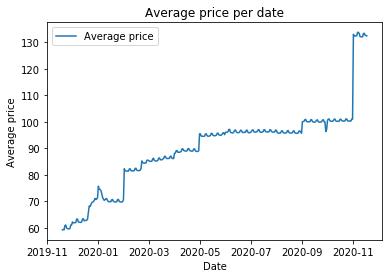

In [46]:
# Question 6: Plotting prices per day

    plt.plot(df_avg_price_per_date.date, df_avg_price_per_date.AvgPrice, label = "Average price") 

    # Naming the x axis 
    plt.xlabel('Date') 
    # Naming the y axis 
    plt.ylabel('Average price') 
    # Giving a title 
    plt.title('Average price per date') 

    plt.legend() 
    plt.show() 

# Question 7: Listings per Host

The number of listings of each host are calculated and sorted in descending order. In order to depict the desired plots, a new ranking and logarithmic column are created for each host indicating their relevancy in comparison with the other hosts regarding the number of listings they own. As it can be seen, the top host holds 126 listings in their property. 

In [47]:
# Question 7(a): Calculating listings per host 

    listings_per_host = listings.groupby(['host_id'])['id'].size().reset_index(name='no_listings_per_host').sort_values(by=['no_listings_per_host'], ascending=False) 
    # The hosts are ranked based on the number of the listings they own
    listings_per_host['ranking'] = range(1, 1+len(listings_per_host))
    # The ranking is also calculated in the logarithmic scale
    listings_per_host['log_ranking'] = np.log10(listings_per_host['ranking'])
    
    listings_per_host    

,host_id,no_listings_per_host,ranking,log_ranking
2390,77457889,126,1,0.000000
1201,29927830,94,2,0.301030
77,748818,85,3,0.477121
4179,182755179,83,4,0.602060
140,1621474,78,5,0.698970
3378,135482892,78,6,0.778151
125,1418201,66,7,0.845098
2966,112527018,60,8,0.903090
166,2089542,55,9,0.954243
4957,220022946,47,10,1.000000


In [49]:
# Question 7(b): Plotting the distribution of listings per host 

    from bokeh.plotting import figure, ColumnDataSource
    from bokeh.models import Title
    from bokeh.io import output_file, show
    from bokeh.models import HoverTool

    # Create a ColumnDataSource from df: listings_per_host
    source = ColumnDataSource(listings_per_host)

    # Create the figure: p
    p = figure(title="Ranking of hosts based on number of listings", toolbar_location="above", tools=["hover"])
    # Configure visual properties on the plot's title attribute
    p.title.align = "left"
    p.add_layout(Title(text="Ranking", align="center"), "below")

    # Add line glyphs to the figure p
    p.line('ranking', 'no_listings_per_host', source= source)
    hover = HoverTool(tooltips=[("Hosting ID","@host_id")])

    p.add_tools(hover)
    show(p)

In [50]:
# Question 7(b): Plotting the distribution of listings per host (logarithmic scale)

    from bokeh.plotting import figure, ColumnDataSource
    from bokeh.models import Title
    from bokeh.io import output_file, show
    from bokeh.models import HoverTool
    from math import log

    # Create a ColumnDataSource from df: listings_per_host
    source = ColumnDataSource(listings_per_host)

    # Create the figure: p
    p = figure(title="Ranking of hosts based on number of listings", toolbar_location="above", tools=["hover"])
    # Configure visual properties on the plot's title attribute
    p.title.align = "left"
    p.add_layout(Title(text="Ranking (logarithmic scale)", align="center"), "below")

    # Add line glyphs to the figure p
    p.line('log_ranking', 'no_listings_per_host', source= source)
    hover = HoverTool(tooltips=[("Hosting ID","@host_id")])
    
    p.add_tools(hover)
    show(p)

# Question 8: Visualize Listings

As requested, the folium library is used to depict the listings located in Athens. In this interactive map, the listings are grouped in clusters and when the user selects to view any cluster the listings included in this cluster are visible. The information displayed for each listing in the map are name, price and neighbourhood. 

In [51]:
# We add again the currency symbol in the price of the listings before visualizing them 
listings['price'] ='$'+ listings['price'].astype(str)

import folium
from folium import plugins
from IPython.display import IFrame

m = folium.Map(
    location=[37.97945, 23.71622],
    zoom_start=15,
    tiles='Stamen Terrain'
)

markerCluster = folium.plugins.MarkerCluster().add_to(m)
lat=0.
lon=0.
for index,row in listings.iterrows():
    var_price = row['price']
    var_name = row['name']
    var_neighbourhood = row['neighbourhood']
    lat=row['latitude']
    lon=row['longitude']
        
    html = f'''
    <h1>Price: </h1>{ var_price }<br>
    <h1>Name: </h1>{ var_name }<br>
    <h1>Neighbourhood: </h1>{ var_neighbourhood }<br>'''
    
    iframe = folium.IFrame(html=html, width=400, height=200)
    popup = folium.Popup(iframe, max_width=2650)
    folium.Marker([lat, lon], popup=popup).add_to(markerCluster)

m.save('/Users/eleftheriaapostolaki/Desktop/map.html')